In [67]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [68]:
ftrain, ftest = h5py.File('train_catvnoncat.h5','r'), h5py.File('test_catvnoncat.h5')
print(ftrain.keys(),'\n',ftest.keys())

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']> 
 <KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>


In [69]:
print(ftrain['list_classes'])
print(ftrain['train_set_x'])
print(ftrain['train_set_y'])

<HDF5 dataset "list_classes": shape (2,), type "|S7">
<HDF5 dataset "train_set_x": shape (209, 64, 64, 3), type "|u1">
<HDF5 dataset "train_set_y": shape (209,), type "<i8">


In [70]:
class_data = ftrain['list_classes']
Classes = class_data[:]
#we can do it in the following way also
# Classes = list(class_data)
Classes


array([b'non-cat', b'cat'], dtype='|S7')

In [71]:
X_data,X_data_test = ftrain['train_set_x'], ftest['test_set_x']
X_train_orig , X_test_orig= X_data[:],X_data_test[:]
X_train_orig,X_test_orig

(array([[[[ 17,  31,  56],
          [ 22,  33,  59],
          [ 25,  35,  62],
          ...,
          [  1,  28,  57],
          [  1,  26,  56],
          [  1,  22,  51]],
 
         [[ 25,  36,  62],
          [ 28,  38,  64],
          [ 30,  40,  67],
          ...,
          [  1,  27,  56],
          [  1,  25,  55],
          [  2,  21,  51]],
 
         [[ 32,  40,  67],
          [ 34,  42,  69],
          [ 35,  42,  70],
          ...,
          [  1,  25,  55],
          [  0,  24,  54],
          [  1,  21,  51]],
 
         ...,
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
          ...,
          [  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0]],
 
         [[  0,   0,   0],
          [  0,   0,   0],
          [  0,   0,   0],
   

In [72]:
Y_data, Y_data_test= ftrain['train_set_y'],ftest['test_set_y']
Y_train_orig = Y_data[:]
Y_test_orig=Y_data_test[:]
print(Y_train_orig)
print(Y_train_orig.shape, Y_test_orig.shape)

[0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 1 0 1 1 1 1 1
 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0
 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0
 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0]
(209,) (50,)


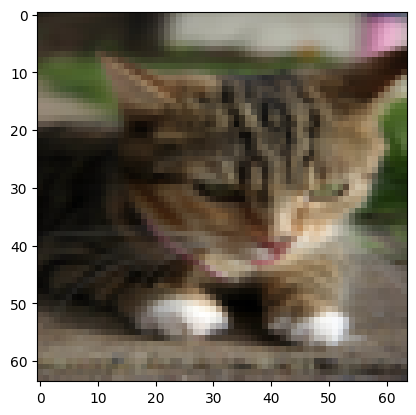

In [73]:
#showing image

index = 104
plt.imshow(X_train_orig[index])

In [74]:
#flattening

X_train_flat = X_train_orig.reshape(X_train_orig.shape[0],X_train_orig.shape[1]*X_train_orig.shape[2]*X_train_orig.shape[3])
X_test_flat=X_test_orig.reshape(X_test_orig.shape[0],X_test_orig.shape[1]*X_test_orig.shape[2]*X_test_orig.shape[3])

#standardise values to 0 to 1
X_train = X_train_flat/255
X_test=X_test_flat/255

print(X_train.shape, X_test.shape)

(209, 12288) (50, 12288)


In [75]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [76]:
X_train=torch.from_numpy(X_train)
Y_train=torch.from_numpy(Y_train_orig)
X_test=torch.from_numpy(X_test)
Y_test=torch.from_numpy(Y_test_orig)
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape

(torch.Size([209, 12288]),
 torch.Size([209]),
 torch.Size([50, 12288]),
 torch.Size([50]))

In [133]:
Y_train=Y_train.reshape(-1,1)
Y_test=Y_test.reshape(-1,1)

Y_train.shape,Y_test.shape

(torch.Size([209, 1]), torch.Size([50, 1]))

In [134]:
X_train = X_train.to(dtype=torch.float32)
X_test=X_test.to(dtype=torch.float32)

Y_train=Y_train.to(dtype=torch.float32)
Y_test=Y_test.to(dtype=torch.float32)

In [135]:
device= torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [136]:
input_size=12288
num_classes=1
hidden_size=512
hidden_size_2=128
hidden_size_3=32
num_epochs=10
#batch_size=50
learning_rate=0.01

In [137]:
class NeuralNet(nn.Module):
    def __init__(self,input_size,hidden_size,hidden_size_2,hidden_size_3,num_classes):
        super(NeuralNet,self).__init__()

        self.l1=nn.Linear(input_size,hidden_size)   #First layer is a linear layer with in=input_size and out=hidden_layers
        self.relu=nn.ReLU()                         #Define our activation function
        self.l2=nn.Linear(hidden_size,hidden_size_2)  #Second layer with in=hidden_layers, out=num_classes
        self.l3=nn.Linear(hidden_size_2,hidden_size_3)
        self.l4=nn.Linear(hidden_size_3,num_classes)

    def forward(self,x):
        out=self.l1(x)
        out=self.relu(out)
        out=self.l2(out) 
        out=self.relu(out)  
        out=self.l3(out) 
        out=self.relu(out)
        out=self.l4(out)
        out=torch.sigmoid(out)                        #we output a linear value and apply the sigmoid func at the end to obtain a probability
        return out

In [138]:
model=NeuralNet(input_size,hidden_size,hidden_size_2,hidden_size_3,num_classes)

In [139]:
criterion= nn.BCELoss()

optimizer=torch.optim.Adam(model.parameters(),lr=learning_rate)

In [140]:
for epochs in range(1000):

    #forward pass
    output=model(X_train)
    loss=criterion(output,Y_train)

    #backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if (epochs+1)%100 ==0:
        print(f'epoch={epochs+1}, loss= {loss.item()}')

epoch=100, loss= 0.33157169818878174
epoch=200, loss= 1.2462191989470739e-06
epoch=300, loss= 1.2682092176419246e-07
epoch=400, loss= 7.396459267283717e-08
epoch=500, loss= 5.0919727101472745e-08
epoch=600, loss= 3.810525583958224e-08
epoch=700, loss= 2.9252030131488027e-08
epoch=800, loss= 2.353696437751296e-08
epoch=900, loss= 1.9465616674096964e-08
epoch=1000, loss= 1.6374531952578764e-08


In [141]:
output

tensor([[1.2314e-06],
        [2.2948e-13],
        [1.0000e+00],
        [3.7952e-21],
        [8.5691e-08],
        [6.0135e-10],
        [2.2437e-11],
        [1.0000e+00],
        [2.4554e-16],
        [7.3509e-13],
        [8.3728e-17],
        [1.0000e+00],
        [1.6373e-10],
        [1.0000e+00],
        [1.0000e+00],
        [1.9365e-17],
        [7.5503e-21],
        [2.1214e-20],
        [1.2563e-14],
        [1.0000e+00],
        [8.3448e-20],
        [1.4049e-09],
        [3.5349e-16],
        [1.9033e-18],
        [1.0000e+00],
        [1.0000e+00],
        [1.3455e-13],
        [1.0000e+00],
        [6.3190e-12],
        [1.0000e+00],
        [3.1277e-10],
        [3.8790e-11],
        [1.0708e-12],
        [3.9648e-12],
        [1.1227e-08],
        [8.5034e-14],
        [2.5133e-17],
        [3.3673e-18],
        [1.0000e+00],
        [4.5483e-09],
        [7.1489e-12],
        [1.0000e+00],
        [1.0000e+00],
        [1.9558e-18],
        [2.7124e-17],
        [2

In [152]:
test_out=model(X_test)

test_out

tensor([[1.0000e+00],
        [1.0000e+00],
        [1.0000e+00],
        [1.0000e+00],
        [9.9988e-01],
        [1.0000e+00],
        [6.2376e-23],
        [1.0000e+00],
        [1.0000e+00],
        [1.0000e+00],
        [1.0000e+00],
        [1.0000e+00],
        [1.0000e+00],
        [1.0000e+00],
        [4.2733e-20],
        [1.0000e+00],
        [1.2158e-12],
        [1.0000e+00],
        [2.2253e-13],
        [8.2820e-19],
        [1.0000e+00],
        [6.0660e-10],
        [1.5894e-18],
        [1.0000e+00],
        [5.1645e-02],
        [1.0965e-06],
        [1.0000e+00],
        [1.6566e-18],
        [1.1208e-11],
        [1.0000e+00],
        [9.9667e-01],
        [1.0000e+00],
        [1.0000e+00],
        [1.0000e+00],
        [1.0000e+00],
        [4.8623e-15],
        [5.1906e-14],
        [1.0000e+00],
        [8.8555e-08],
        [6.2196e-11],
        [1.3409e-07],
        [8.5781e-13],
        [1.0000e+00],
        [6.2244e-11],
        [1.0000e+00],
        [9

In [153]:
correct=0
for i in range(len(test_out)):
    if test_out[i]>0.5:
        test_out[i]=1
    else:
        test_out[i]=0


for i in range(len(test_out)):
    if test_out[i]==Y_test[i]:
        correct+=1

print(correct/(Y_test.shape[0]))

for i in range(len(test_out)):
    if test_out[i]==0 and Y_test[i]==1:
        print(i,end=' ')    
    

0.7
6 18 19 24 25 28 40 41 46 

In [144]:
for i in range(len(Y_test)):
    if Y_test[i]==1:
        print(i,end=' ')

0 1 2 3 4 6 7 8 9 10 11 12 15 17 18 19 20 23 24 25 26 28 30 31 32 33 37 40 41 42 46 47 48 

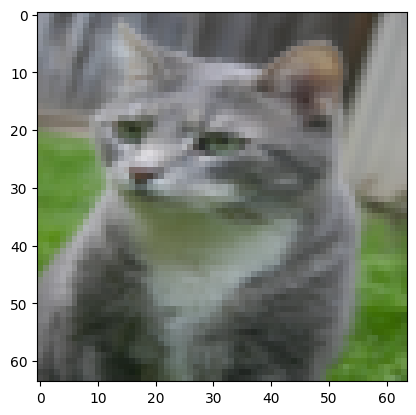

In [145]:
index = 46
plt.imshow(X_test_orig[index])